## Part 1: Database Setup and Data Modeling 

### Task 1.1: Create Database and Collections

In [2]:
# Importing the libraries needed for this project
# MongoDB setup
# datetime for time
# pandas, seaborn, matplotlib for visualization
# faker to generate fake data
# Random to generate random numbers of choice

from pymongo import MongoClient
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import pandas as pd
import random

In [ ]:
# Connecting to mongodb client and creating a database
client = MongoClient("mongodb://localhost:27017/")
db = client["eduhub_dbs"]

# creation of collections to store data.
users_collection = db["users"]
courses_collection = db["courses"]
enrollments_collection = db["enrollments"]
lessons_collection = db["lessons"]
assignments_collection = db["assignment"]
submissions_collection = db["submissions"]

# Initializing the faker library to generate sample data

fake = Faker()

In [4]:
import pprint as pp

# This code is used as a unified print to run my code in a list format
def print_result(cursor):
    _list = list(cursor)
    len_list = len(_list)
    print(f"Total documents: {len_list}") 
    pp.pprint(_list)

## Task 1.2: Design Document Schemas

### Create sample documents for each collection with appropriate data types and structure:

In [265]:
# Create a sample documents for each collection with appropriate data structure and types for the user

# Here is the sample data
user_schema = {
    "user_id": 1,
    "email": "john@mich.com",
    "firstname": "micheal",
    "lastname": "mathew",
    "role": "student",
    "date_joined": datetime(2024,8,1),
    "profile": {
        "bio": "Data Engineer",
        "avatar": "https://example.com/avatar.jpg",
        "skills": "Python",
    },
    "is_active": True
}
result = users_collection.insert_one(user_schema)
print("Inserted user_ID:", result.inserted_id)

Inserted user_ID: 684bc24b50966d2c2d7120d4


In [267]:
# Create a sample documents for each collection with appropriate data structure and types for the courses

course_schema = {
    "course_id": "MongoDB-101",
    "title": "Introduction to MongoDB",
    "description": "learn MongoDB",
    "instructorId": user_schema["user_id"],
    "category": "Database",
    "level": "advanced",
    "duration": 4.0,
    "price": 105.00,
    "tags": "MongoDB",
    "createdAt": datetime(2024, 8, 1),
    "updatedAt": datetime.now(),
    "isPublished": True
}
result = courses_collection.insert_one(course_schema)
print("Inserted course_id:", result.inserted_id)

Inserted course_id: 684bc2a450966d2c2d7120e9


## Part 2: Data Population 

### Task 2.1: Insert Sample Data

### Insert at least:

#### 20 users (mix of students and instructors)

#### 8 courses across different categories

#### 15 enrollments

#### 25 lessons

#### 10 assignments

#### 12 assignment submissions

In [252]:
# Insert Sample Data to populate to the code
# This collections were created in oredr to input into the task data
 
enrollments_collection = db["enrollments"]
lessons_collection = db["lessons"]
assignments_collection = db["assignment_data"]
submissions_collection = db["submissions"]

In [266]:
# Add more sample students with similar structure but different values
# Let's add more students programmatically

# Task 2.1.1: Insert 20 users data
# Data generated which is inserted into the user_collection 

bio = ["Data Engineer", "Database Engineer", "Python Associate", "SQL Engineer"]
skills = ["Python", "MongoDB", "SQL", "Cloud", "JupyterLab"]

# Ensuring the students are more than the instructors, reason for the variable usage
user_ids = []
num_students = 15
num_instructors = 5

# First insert students
for i in range(num_students):
    user = {
        "user_id": i + 2,
        "email": fake.email(),
        "firstname": fake.first_name(),
        "lastname": fake.last_name(),
        "role": "student",  # explicitly a student
        "date_joined": fake.date_time_this_year(),
        "profile": {
            "bio": random.choice(bio),
            "avatar": fake.image_url(),
            "skills": random.choice(skills)
        },
        "is_active": random.choice([True, False])
    }
    result = users_collection.insert_one(user)
    user_ids.append(str(user["user_id"]))

# Then insert instructors
for i in range(num_instructors):
    user = {
        "user_id": num_students + i + 2, # to avoid duplicate number by looping
        "email": fake.email(),
        "firstname": fake.first_name(),
        "lastname": fake.last_name(),
        "role": "instructor",  # explicitly an instructor
        "date_joined": fake.date_time_this_year(),
        "profile": {
            "bio": random.choice(bio),
            "avatar": fake.image_url(),
            "skills": random.choice(skills)
        },
        "is_active": random.choice([True, False])
    }
    result = users_collection.insert_one(user)
    user_ids.append(str(user["user_id"]))

# Print all users
for user in users_collection.find():
    print_result(user)


Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile'

In [268]:
# Add more sample students with similar structure but different values
# Let's add more students programmatically

# Task 2.1.2: Insert 8 courses data
# Data generated which is inserted into the course_collection 

titles = ["MongoDB", "Python"]
descriptions = ["Learn MongoDB", "Be an Expert in MongoDB"]

# Get all instructors from user_schema collection
instructors = list(users_collection.find({"role": "instructor"}))
instructor_ids = [instructor["user_id"] for instructor in instructors]

course_ids = []

for i in range(8):
    title = random.choice(titles)
    course_title = title.lower().replace(" ", "-")
    course_id = f"{course_title}-{random.randint(100, 120)}"

    if not instructor_ids:
        print("No instructors found. Skipping course creation.")
        break

    course = {
        "course_id": course_id,
        "title": title,
        "description": random.choice(descriptions),
        "instructorId": random.choice(instructor_ids),
        "category": random.choice(["Database", "Programming"]),
        "level": random.choice(["beginner", "intermediate", "advanced"]),
        "duration": round(random.uniform(5, 20), 1),
        "price": round(random.uniform(80, 200), 2),
        "tags": random.sample(["MongoDB", "Python", "basics", "Learning"], k=2),  # list of tags
        "createdAt": datetime(2024, 8, 1),
        "updatedAt": datetime.now(),
        "isPublished": True    
    }

    result = courses_collection.insert_one(course)
    course_ids.append(course_id)

# Print all inserted courses
all_courses = list(courses_collection.find())
print("Total documents:", len(all_courses))
for course in all_courses:
    print_result(course)

Total documents: 9
Total documents: 13
['_id',
 'course_id',
 'title',
 'description',
 'instructorId',
 'category',
 'level',
 'duration',
 'price',
 'tags',
 'createdAt',
 'updatedAt',
 'isPublished']
Total documents: 13
['_id',
 'course_id',
 'title',
 'description',
 'instructorId',
 'category',
 'level',
 'duration',
 'price',
 'tags',
 'createdAt',
 'updatedAt',
 'isPublished']
Total documents: 13
['_id',
 'course_id',
 'title',
 'description',
 'instructorId',
 'category',
 'level',
 'duration',
 'price',
 'tags',
 'createdAt',
 'updatedAt',
 'isPublished']
Total documents: 13
['_id',
 'course_id',
 'title',
 'description',
 'instructorId',
 'category',
 'level',
 'duration',
 'price',
 'tags',
 'createdAt',
 'updatedAt',
 'isPublished']
Total documents: 13
['_id',
 'course_id',
 'title',
 'description',
 'instructorId',
 'category',
 'level',
 'duration',
 'price',
 'tags',
 'createdAt',
 'updatedAt',
 'isPublished']
Total documents: 13
['_id',
 'course_id',
 'title',
 'descrip

In [271]:
# Add more sample students with similar structure but different values
# Let's add more students programmatically

# Task 2.1.3: Insert 15 enrollments data
# Data generated which is inserted into the enrollments_collection 

# Step 1: Fetch existing course IDs from the courses collection
existing_courses = list(courses_collection.find({}, {"course_id": 1, "_id": 0}))

# Step 2: Extract the list of course IDs
course_ids = [course["course_id"] for course in existing_courses if "course_id" in course]

if not course_ids:
    print("No valid course IDs found in courses_collection.")
else:
    def insert_sample_enrollments(num_enrollments=15):
        enrollments = []
        for i in range(num_enrollments):
            # Randomly choose a gap of 1, 2, or 3 months
            months_ago = random.choice([1, 2, 3])
            days_offset = months_ago * 30  # Approximate month as 30 days
            enrollment_date = datetime.now() - timedelta(days=days_offset)

            enrollment = {
                "course_id": random.choice(course_ids),
                "enrolled_at": enrollment_date,
                "completed": random.choice([True, False])
            }
            enrollments.append(enrollment)

        result = enrollments_collection.insert_many(enrollments)
        print(f"{len(result.inserted_ids)} enrollments inserted.")

    insert_sample_enrollments()

    # Show all enrollments
    all_enrollment = list(enrollments_collection.find())
    print("Total documents:", len(all_enrollment))
    for enrollment in all_enrollment:
        print_result(enrollment)


15 enrollments inserted.
Total documents: 15
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Tot

In [272]:
# Add more sample students with similar structure but different values
# Let's add more students programmatically

# Task 2.1.4: Insert 25 lessons data
# Data generated which is inserted into the lessons_collection
lesson_titles = ["Intro to MongoDB", "MongoDB Intermediate"]
lesson_content = [
    "MongoDB", "NoSQL", "Document Database", "Replication",
    "Collections", "Indexes", "Aggregation", "CRUD Operations"
]

for i in range(25):
    lesson = {
        "course_id": random.choice(course_ids),  # valid course ID
        "title": random.choice(lesson_titles),
        "content": random.choice(lesson_content),
        "order": i + 1,
        "duration": round(random.uniform(4, 20), 1),  # in hours
        "rating": round(random.uniform(3.0, 5.0), 1)  # lesson rating between 3.0 and 5.0
    }
    lessons_collection.insert_one(lesson)

print("Total lessons:", lessons_collection.count_documents({}))
all_lessons = list(lessons_collection.find())
print("Total documents:", len(all_lessons))
for lesson in all_lessons:
    print_result(lesson)  

Total lessons: 25
Total documents: 25
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'co

In [273]:
# Add more sample students with similar structure but different values
# Let's add more students programmatically

# Task 2.1.5: Insert 10 Assignments data
# Data generated which is inserted into the assignments_collection 

assignments_collection = db["assignment"]

for i in range(10):
    assignment = {
        "course_id": random.choice(course_ids),
        "title": random.choice(["Intro to MongoDB", "MongoDB intermediate"]),
        "description": random.choice(["Learn MongoDB", "Learn Python", "Be an Expert in MongoDB"]),
        "due_date": datetime(2025, 4, 30)
    }
    assignments_collection.insert_one(assignment)
    
all_assignments = list(assignments_collection.find())
print("Total documents:", len(all_assignments))
for assignment in all_assignments:
    print(assignment)     

Total documents: 10
{'_id': ObjectId('684bc5d450966d2c2d71211a'), 'course_id': 'MongoDB-101', 'title': 'Intro to MongoDB', 'description': 'Learn MongoDB', 'due_date': datetime.datetime(2025, 4, 30, 0, 0)}
{'_id': ObjectId('684bc5d450966d2c2d71211b'), 'course_id': 'mongodb-106', 'title': 'Intro to MongoDB', 'description': 'Learn MongoDB', 'due_date': datetime.datetime(2025, 4, 30, 0, 0)}
{'_id': ObjectId('684bc5d450966d2c2d71211c'), 'course_id': 'python-103', 'title': 'Intro to MongoDB', 'description': 'Learn MongoDB', 'due_date': datetime.datetime(2025, 4, 30, 0, 0)}
{'_id': ObjectId('684bc5d450966d2c2d71211d'), 'course_id': 'mongodb-108', 'title': 'Intro to MongoDB', 'description': 'Learn Python', 'due_date': datetime.datetime(2025, 4, 30, 0, 0)}
{'_id': ObjectId('684bc5d450966d2c2d71211e'), 'course_id': 'mongodb-106', 'title': 'MongoDB intermediate', 'description': 'Be an Expert in MongoDB', 'due_date': datetime.datetime(2025, 4, 30, 0, 0)}
{'_id': ObjectId('684bc5d450966d2c2d71211f'

In [275]:
# Add more sample students with similar structure but different values
# Let's add more students programmatically

# Task 2.1.6: Insert 12 Assignment Submissions data
# Data generated which is inserted into the submissions_collection 

# Filter only student users from the users collection
students = list(users_collection.find({"role": "student"}))
student_ids = [student["user_id"] for student in students]

# Generate submissions
for i in range(12):
    submission = {
        "user_id": random.choice(student_ids),
        "submitted_at": datetime(2025, 5, 31),
        "grade": random.randint(50, 100)
    }
    submissions_collection.insert_one(submission)

# Display all submissions
all_submissions = list(submissions_collection.find())
print("Total documents:", len(all_submissions))
for submission in all_submissions:
    print_result(submission)

Total documents: 12
Total documents: 4
['_id', 'user_id', 'submitted_at', 'grade']
Total documents: 4
['_id', 'user_id', 'submitted_at', 'grade']
Total documents: 4
['_id', 'user_id', 'submitted_at', 'grade']
Total documents: 4
['_id', 'user_id', 'submitted_at', 'grade']
Total documents: 4
['_id', 'user_id', 'submitted_at', 'grade']
Total documents: 4
['_id', 'user_id', 'submitted_at', 'grade']
Total documents: 4
['_id', 'user_id', 'submitted_at', 'grade']
Total documents: 4
['_id', 'user_id', 'submitted_at', 'grade']
Total documents: 4
['_id', 'user_id', 'submitted_at', 'grade']
Total documents: 4
['_id', 'user_id', 'submitted_at', 'grade']
Total documents: 4
['_id', 'user_id', 'submitted_at', 'grade']
Total documents: 4
['_id', 'user_id', 'submitted_at', 'grade']


## Part 3: Basic CRUD Operations

### Task 3.1: Create Operations

In [276]:
# Write Python code using PyMongo to:
# Task 3.1.1: Add a new student user

bio = ["Data Engineer", "Database Engineer", "Python Associate", "SQL Engineer"]
skills = ["Python", "MongoDB", "SQL", "Cloud", "JupyterLab"]

def add_student_user(firstname, lastname, email):
    try: 
        # Inline logic to get the next user_id
        last_user = users_collection.find_one(
            {"user_id": {"$exists": True}},
            sort=[("user_id", -1)]
        )
        next_user_id = last_user["user_id"] + 1 if last_user else 1
        
        student = {
            "user_id": next_user_id,
            "firstname": firstname,
            "lastname": lastname,
            "email": email,
            "role": "student",
            "date_joined": datetime.now(),
            "profile": {
                "bio": random.choice(bio),
                "avatar": fake.image_url(),
                "skills": random.choice(skills)
            },
            "is_active": True
        }
        result = users_collection.insert_one(student)
        print("New student user added with ID:", next_user_id)
        return next_user_id
    except Exception as e:
        print(f"error adding new users:{e}")
        return None

# Let's try the code we run with an example
new_student = add_student_user("Matthew", "James", "matjames@yahoo.com")
print("Assigned user_id:", new_student)

New student user added with ID: 22
Assigned user_id: 22


In [277]:
all_users= list(users_collection.find())
print("Total documents:", len(all_users))
for user in all_users:
    print_result(user) 

Total documents: 22
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date

In [278]:
# Write Python code using PyMongo to:
# Task 3.1.2: Create a new course

new_course_id = f"mongodbprac-{random.randint(121, 130)}"
new_course = {
    "course_id": new_course_id,
    "title": "MongoDB Practical",
    "description": "A practical introduction to MongoDB for developers.",
    "instructorId": random.choice(instructor_ids),
    "category": "Database",
    "level": "beginner",
    "duration": 10.0,
    "price": 99.99,
    "tags": ["MongoDB", "basics"],
    "createdAt": datetime.now(),
    "isPublished": True
}

courses_collection.insert_one(new_course)
course_ids.append(new_course_id)

# Print all inserted courses
all_courses = list(courses_collection.find())
print("Total documents:", len(all_courses))
for course in all_courses:
    print_result(course)

Total documents: 10
Total documents: 13
['_id',
 'course_id',
 'title',
 'description',
 'instructorId',
 'category',
 'level',
 'duration',
 'price',
 'tags',
 'createdAt',
 'updatedAt',
 'isPublished']
Total documents: 13
['_id',
 'course_id',
 'title',
 'description',
 'instructorId',
 'category',
 'level',
 'duration',
 'price',
 'tags',
 'createdAt',
 'updatedAt',
 'isPublished']
Total documents: 13
['_id',
 'course_id',
 'title',
 'description',
 'instructorId',
 'category',
 'level',
 'duration',
 'price',
 'tags',
 'createdAt',
 'updatedAt',
 'isPublished']
Total documents: 13
['_id',
 'course_id',
 'title',
 'description',
 'instructorId',
 'category',
 'level',
 'duration',
 'price',
 'tags',
 'createdAt',
 'updatedAt',
 'isPublished']
Total documents: 13
['_id',
 'course_id',
 'title',
 'description',
 'instructorId',
 'category',
 'level',
 'duration',
 'price',
 'tags',
 'createdAt',
 'updatedAt',
 'isPublished']
Total documents: 13
['_id',
 'course_id',
 'title',
 'descri

In [284]:
# Write Python code using PyMongo to:
# Task 3.1.3: Enroll a student in a course

def enroll_student(user_id, course_id):
    # Check that the user exists and is a student
    student = users_collection.find_one({"user_id": user_id, "role": "student"})
    if not student:
        print(f"User with ID {user_id} is not a student or doesn't exist.")
        return

    # Check that the course exists
    course = courses_collection.find_one({"course_id": course_id})
    if not course:
        print(f"Course with ID {course_id} does not exist.")
        return

    # Check if already enrolled
    existing = enrollments_collection.find_one({
        "user_id": user_id,
        "course_id": course_id
    })
    if existing:
        print(f"Student {user_id} is already enrolled in course {course_id}.")
        return

    # Enroll the student
    enrollment = {
        "user_id": user_id,
        "course_id": course_id,
        "enrolled_at": datetime.now()
    }
    enrollments_collection.insert_one(enrollment)
    print(f"Student {user_id} enrolled in course {course_id}.")

# Example
user_id = 22
course_id = "python-103"

enroll_student(user_id, course_id)


Student 22 enrolled in course python-103.


In [285]:
# Show all enrollments
all_enrollment = list(enrollments_collection.find())
print("Total documents:", len(all_enrollment))
for enrollment in all_enrollment:
    print_result(enrollment)

Total documents: 16
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', '

In [286]:
# Write Python code using PyMongo to:
# Task 3.1.4: Enroll a student in a course

def add_lesson_to_course(course_id, title, content, duration_hours):
    
    # Check if the course exists
    course = courses_collection.find_one({"course_id": course_id})
    if not course:
        print(f"Course with ID {course_id} not found.")
        return

    # Create lesson document
    lesson = {
        "course_id": course_id,
        "title": title,
        "content": content,
        "duration": duration_hours,
        "created_at": datetime.now(),
    }

    # Insert into lessons collection
    lessons_collection.insert_one(lesson)
    print(f"Lesson '{title}' added to course '{course_id}'.")

# Example on how to enroll
course_id = "mongodb-103"  # Replace with actual course ID
lesson_title = "Introduction to NOSQL"
lesson_content = "This lesson covers NOSQL."
lesson_duration = 3  # hours

add_lesson_to_course(course_id, lesson_title, lesson_content, lesson_duration)



Lesson 'Introduction to NOSQL' added to course 'mongodb-103'.


In [287]:
# Show all LESSONS
all_lessons = list(lessons_collection.find())
print("Total documents:", len(all_lessons))
for lesson in all_lessons:
    print_result(lesson)  

Total documents: 26
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', '

### Task 3.2: Read Operations

In [ ]:
# Task 3.2.1: Find all active students
def find_many(filter):
    try:
        result = users_collection.find(filter)
        return result
    except Exception as e:
        print(f"error finding document:{e}")
        return None


In [289]:
# Use list to show the query
filter = {"is_active": True}
resp = find_many(filter)
resp = list(resp)
list(resp)

[{'_id': ObjectId('684bc24b50966d2c2d7120d4'),
  'user_id': 1,
  'email': 'john@mich.com',
  'firstname': 'micheal',
  'lastname': 'mathew',
  'role': 'student',
  'date_joined': datetime.datetime(2024, 8, 1, 0, 0),
  'profile': {'bio': 'Data Engineer',
   'avatar': 'https://example.com/avatar.jpg',
   'skills': 'Python'},
  'is_active': True},
 {'_id': ObjectId('684bc26050966d2c2d7120d7'),
  'user_id': 4,
  'email': 'debramills@example.org',
  'firstname': 'Nicholas',
  'lastname': 'Nguyen',
  'role': 'student',
  'date_joined': datetime.datetime(2025, 3, 2, 10, 44, 2),
  'profile': {'bio': 'Data Engineer',
   'avatar': 'https://placekitten.com/338/989',
   'skills': 'Python'},
  'is_active': True},
 {'_id': ObjectId('684bc26050966d2c2d7120db'),
  'user_id': 8,
  'email': 'mjohnson@example.com',
  'firstname': 'Brooke',
  'lastname': 'Walsh',
  'role': 'student',
  'date_joined': datetime.datetime(2025, 4, 15, 16, 53, 44),
  'profile': {'bio': 'Data Engineer',
   'avatar': 'https://pi

In [ ]:
# Task 3.2.2: Retrieve course details with instructor information
def find_many(filter):
    try:
        result = users_collection.find(filter)
        return result
    except Exception as e:
        print(f"error finding document:{e}")
        return None
    
# Use list to show the query
filter = {"role": "instructor"}
resp = find_many(filter)
resp = list(resp)
list(resp)    

[{'_id': ObjectId('684bc26050966d2c2d7120e4'),
  'user_id': 17,
  'email': 'mromero@example.org',
  'firstname': 'Richard',
  'lastname': 'Frazier',
  'role': 'instructor',
  'date_joined': datetime.datetime(2025, 1, 20, 13, 59, 18),
  'profile': {'bio': 'Data Engineer',
   'avatar': 'https://placekitten.com/379/447',
   'skills': 'JupyterLab'},
  'is_active': False},
 {'_id': ObjectId('684bc26050966d2c2d7120e5'),
  'user_id': 18,
  'email': 'olsonbrian@example.net',
  'firstname': 'Albert',
  'lastname': 'Davis',
  'role': 'instructor',
  'date_joined': datetime.datetime(2025, 4, 25, 14, 31, 44),
  'profile': {'bio': 'SQL Engineer',
   'avatar': 'https://dummyimage.com/621x315',
   'skills': 'JupyterLab'},
  'is_active': True},
 {'_id': ObjectId('684bc26050966d2c2d7120e6'),
  'user_id': 19,
  'email': 'susan81@example.net',
  'firstname': 'Nicholas',
  'lastname': 'Jones',
  'role': 'instructor',
  'date_joined': datetime.datetime(2025, 2, 5, 14, 8, 51),
  'profile': {'bio': 'SQL Engi

In [ ]:
# Task 3.2.3: Get all courses in a specific category
#Use def to create a function 
def find_many(filter):
    try:
        result = courses_collection.find(filter)
        return result
    except Exception as e:
        print(f"error finding document:{e}")
        return None
    
# Use list to show the query
filter = {"category": "Database"}
resp = find_many(filter)
resp = list(resp)
list(resp)

[{'_id': ObjectId('684bc2a450966d2c2d7120e9'),
  'course_id': 'MongoDB-101',
  'title': 'Introduction to MongoDB',
  'description': 'learn MongoDB',
  'instructorId': 1,
  'category': 'Database',
  'level': 'advanced',
  'duration': 4.0,
  'price': 105.0,
  'tags': 'MongoDB',
  'createdAt': datetime.datetime(2024, 8, 1, 0, 0),
  'updatedAt': datetime.datetime(2025, 6, 13, 7, 18, 12, 204000),
  'isPublished': True},
 {'_id': ObjectId('684bc2ad50966d2c2d7120ea'),
  'course_id': 'mongodb-106',
  'title': 'MongoDB',
  'description': 'Learn MongoDB',
  'instructorId': 19,
  'category': 'Database',
  'level': 'intermediate',
  'duration': 8.2,
  'price': 134.38,
  'tags': ['Python', 'basics'],
  'createdAt': datetime.datetime(2024, 8, 1, 0, 0),
  'updatedAt': datetime.datetime(2025, 6, 13, 7, 18, 21, 249000),
  'isPublished': True},
 {'_id': ObjectId('684bc2ad50966d2c2d7120ec'),
  'course_id': 'python-118',
  'title': 'Python',
  'description': 'Learn MongoDB',
  'instructorId': 19,
  'categ

In [ ]:
# Task 3.2.4: Find students enrolled in a particular course
# Use def to create a function using the enrollment collection
def find_many(filter, projection):
    try:
        result = enrollments_collection.find(filter, projection).sort("name", -1) 
        return result
    except Exception as e:
        print(f"error finding document:{e}")
        return None
    
# Use list to show the query
filter = {"course_id": "mongodb-103"}
projection = { }
resp = find_many(filter, projection)
resp = list(resp)
list(resp)

[{'_id': ObjectId('684bc36e50966d2c2d7120f2'),
  'course_id': 'mongodb-103',
  'enrolled_at': datetime.datetime(2025, 4, 14, 7, 21, 34, 479000),
  'completed': True},
 {'_id': ObjectId('684bc36e50966d2c2d7120f3'),
  'course_id': 'mongodb-103',
  'enrolled_at': datetime.datetime(2025, 4, 14, 7, 21, 34, 479000),
  'completed': True}]

In [ ]:
# Task 3.2.5: Search courses by title (case-insensitive, partial match)
# Use def to create a function using the courses collection
def search_courses_by_title(collection, search_term):
    try:
        query = {
            "title": {
                "$regex": search_term,
                "$options": "i"  # 'i' makes it case-insensitive
            }
        }
        return collection.find(query)
    except Exception as e:
        print(f"Error searching courses: {e}")
        return None

#  Search example
search_term = "mongo"  # a partial word
matching_courses = list(search_courses_by_title(courses_collection, search_term))

#  Output
for course in matching_courses:
    print({
        "course_id": course.get("course_id"),
        "title": course.get("title"),
        "description": course.get("description")
    })

print(f"\nTotal courses matching '{search_term}': {len(matching_courses)}")


{'course_id': 'MongoDB-101', 'title': 'Introduction to MongoDB', 'description': 'learn MongoDB'}
{'course_id': 'mongodb-106', 'title': 'MongoDB', 'description': 'Learn MongoDB'}
{'course_id': 'mongodb-103', 'title': 'MongoDB', 'description': 'Learn MongoDB'}
{'course_id': 'mongodb-107', 'title': 'MongoDB', 'description': 'Be an Expert in MongoDB'}
{'course_id': 'mongodb-108', 'title': 'MongoDB', 'description': 'Learn MongoDB'}
{'course_id': 'mongodbprac-124', 'title': 'MongoDB Practical', 'description': 'A practical introduction to MongoDB for developers.'}

Total courses matching 'mongo': 6


### Task 3.3: Update Operations


In [ ]:
# Task 3.3.1 Update a user’s profile information
def update_user_profile(collection, user_id, update_fields):
    try:
        filter_query = {"user_id": user_id}
        update_query = {"$set": update_fields}

        collection.update_one(filter_query, update_query)
        print(f"Update attempted for user_id {user_id}.")
    except Exception as e:
        print(f"Error updating user profile: {e}")
        
update_fields = {
    "name": "Messi Ronaldo",
    "email": "messi_ronaldo@example.com"
}

user_id_to_update = 14

result = update_user_profile(users_collection, user_id_to_update, update_fields)     
print(result)  


Update attempted for user_id 14.
None


In [ ]:
# Task 3.3.2 Mark a course as published
# Use def to create a function using the courses collection
# Function to mark course(s) as published
def mark_course_as_published(collection, filter):
    try:
        resp = collection.update_many(
            filter,
            {"$set": {"isPublished": False}}
        )
        # Take note , all my isPublished data is True, i.e i used False
        print(f"{resp.modified_count} course(s) marked as published.")
        return resp
    except Exception as e:
        print(f"Error updating course: {e}")
        return None
    
# Filter to find a specific course
filter = {"course_id": "mongodb-103"}

# Call the function
mark_course_as_published(courses_collection, filter)

# Verify the update
updated_courses = list(courses_collection.find(filter))
print("Updated Courses:", updated_courses)
print("Total:", len(updated_courses))


1 course(s) marked as published.
Updated Courses: [{'_id': ObjectId('684bc2ad50966d2c2d7120ed'), 'course_id': 'mongodb-103', 'title': 'MongoDB', 'description': 'Learn MongoDB', 'instructorId': 17, 'category': 'Database', 'level': 'beginner', 'duration': 11.0, 'price': 176.73, 'tags': ['Learning', 'Python'], 'createdAt': datetime.datetime(2024, 8, 1, 0, 0), 'updatedAt': datetime.datetime(2025, 6, 13, 7, 18, 21, 252000), 'isPublished': False}]
Total: 1


In [ ]:
# Task 3.3.3 Update assignment grades
def update_submission_grades(filter_query, new_grade):
    try:
        update = {"$set": {"grade": new_grade}}
        result = submissions_collection.update_many(filter_query, update)
        print(f"Updated {result.modified_count} submission(s).")
        return result
    except Exception as e:
        print(f"Error updating grades: {e}")
        return None

resp = update_submission_grades({"grade": {"$lt": 60}}, 60)
print(resp)


Updated 3 submission(s).
UpdateResult({'n': 3, 'nModified': 3, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)


In [308]:
# Task 3.3.4 Add tags to an existing course

def add_tags_to_course(course_id, tags):
    try:
        result = courses_collection.update_one(
            {"course_id": course_id},
            {"$addToSet": {"tags": {"$each": tags}}}
        )
        print(f"Matched: {result.matched_count}")
        return result
    except Exception as e:
        print(f"Error adding tags: {e}")
        return None
# Example tags to add
new_tags = ["backend", "NoSQL", "database"]

# Example course_id to update
course_id = "python-103"

# Call the function
result = add_tags_to_course(course_id, new_tags)
print(result)


Matched: 1
UpdateResult({'n': 1, 'nModified': 0, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)


### Task 3.4: Delete Operations

In [313]:
# Task 3.4.1: Remove a user (soft delete by setting isActive to false)

def delete_user(field, value):
    try:
        resp = users_collection.delete_one({f"{field}": value}) # field is used as a placeholder incase you want to delete any of the instance such as name, age,gpa etc
        return resp
    except Exception as e:
        print(f"Error finding document: {e}")
        return None
# delete a student from the collection (table)
field = "user_id"
value = 14
resp = delete_user(field, value)
print(resp)

all_users = list(users_collection.find())
print("Total documents:", len(all_users))
for user in all_users:
    print_result(user)

DeleteResult({'n': 0, 'ok': 1.0}, acknowledged=True)
Total documents: 21
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',
 'email',
 'firstname',
 'lastname',
 'role',
 'date_joined',
 'profile',
 'is_active']
Total documents: 9
['_id',
 'user_id',

In [317]:
# Task 3.4.2: Delete an enrollment

from bson import ObjectId

def delete_user(enrollment_id):
    try:
        # Ensure the ID is treated as an ObjectId
        resp = enrollments_collection.delete_one({"_id": ObjectId(enrollment_id)})
        print(f"Deleted {resp.deleted_count} enrollment(s).")
        return resp
    except Exception as e:
        print(f"Error deleting document: {e}")
        return None

# Example call
enrollment_id = "684bc36e50966d2c2d7120f3"
resp = delete_user(enrollment_id)

all_enrollment = list(enrollments_collection.find())
print("Total documents:", len(all_enrollment))
for enrollment in all_enrollment:
    print_result(enrollment)

Deleted 1 enrollment(s).
Total documents: 15
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Total documents: 4
['_id', 'course_id', 'enrolled_at', 'completed']
Tot

In [319]:

# Task 3.4.3: Remove a lesson from a course
# Correct way if lessons are separate documents
def remove_lesson_from_course(course_id, lesson_title):
    try:
        resp = lessons_collection.delete_many({
            "course_id": course_id,
            "title": lesson_title
        })
        print(f"{resp.deleted_count} lesson(s) removed.")
        return resp
    except Exception as e:
        print(f"Error removing lesson: {e}")
        return None

# Example
course_id = "mongodb-103"
lesson_title = "Intro to MongoDB"
resp = remove_lesson_from_course(course_id, lesson_title)

all_lessons = list(lessons_collection.find())
print("Total documents:", len(all_lessons))
for lesson in all_lessons:
    print_result(lesson)

1 lesson(s) removed.
Total documents: 25
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 'content', 'order', 'duration', 'rating']
Total documents: 7
['_id', 'course_id', 'title', 

## Part 4: Advanced Queries and Aggregation

### Task 4.1: Complex Queries

In [ ]:
# Task 4.1.1: Find courses with price between $50 and $200

def find_courses_in_price_range(min_price, max_price):
    try:
        return list(courses_collection.find({
            "price": {
                "$gte": min_price,
                "$lte": max_price
            }
        }))
    except Exception as e:
        print(f"Error fetching courses: {e}")
        return []
    
courses_in_range = find_courses_in_price_range(50, 200)
print("Courses between $50 and $200:", len(courses_in_range))
for course in courses_in_range:
    print(course)


Courses between $50 and $200: 10
{'_id': ObjectId('684bc2a450966d2c2d7120e9'), 'course_id': 'MongoDB-101', 'title': 'Introduction to MongoDB', 'description': 'learn MongoDB', 'instructorId': 1, 'category': 'Database', 'level': 'advanced', 'duration': 4.0, 'price': 105.0, 'tags': 'MongoDB', 'createdAt': datetime.datetime(2024, 8, 1, 0, 0), 'updatedAt': datetime.datetime(2025, 6, 13, 7, 18, 12, 204000), 'isPublished': True}
{'_id': ObjectId('684bc2ad50966d2c2d7120ea'), 'course_id': 'mongodb-106', 'title': 'MongoDB', 'description': 'Learn MongoDB', 'instructorId': 19, 'category': 'Database', 'level': 'intermediate', 'duration': 8.2, 'price': 134.38, 'tags': ['Python', 'basics'], 'createdAt': datetime.datetime(2024, 8, 1, 0, 0), 'updatedAt': datetime.datetime(2025, 6, 13, 7, 18, 21, 249000), 'isPublished': True}
{'_id': ObjectId('684bc2ad50966d2c2d7120eb'), 'course_id': 'python-103', 'title': 'Python', 'description': 'Learn MongoDB', 'instructorId': 20, 'category': 'Programming', 'level': 

In [ ]:
# Task 4.1.2: Get users who joined in the last 6 months

def find_recent_users():
    six_months_ago = datetime.now() - timedelta(days=6*30)
    try:
        return list(users_collection.find({
            "joined_at": {"$gte": six_months_ago}
        }))
    except Exception as e:
        print(f"Error fetching recent users: {e}")
        return []
recent_users = find_recent_users()
print("Users who joined in the last 6 months:", len(recent_users))
for user in recent_users:
    print(user)
   

Users who joined in the last 6 months: 0


In [325]:
# Task 4.1.3: Find courses that have specific tags using $in operator

def find_courses_by_tags(tag_list):
    try:
        return list(courses_collection.find({
            "tags": {"$in": tag_list}
        }))
    except Exception as e:
        print(f"Error finding courses by tags: {e}")
        return []
tags_to_search = ["python", "MongoDB"]
courses = find_courses_by_tags(tags_to_search)

print(f"Found {len(courses)} courses with tags {tags_to_search}")
for course in courses:
    print(course)


Found 4 courses with tags ['python', 'MongoDB']
{'_id': ObjectId('684bc2a450966d2c2d7120e9'), 'course_id': 'MongoDB-101', 'title': 'Introduction to MongoDB', 'description': 'learn MongoDB', 'instructorId': 1, 'category': 'Database', 'level': 'advanced', 'duration': 4.0, 'price': 105.0, 'tags': 'MongoDB', 'createdAt': datetime.datetime(2024, 8, 1, 0, 0), 'updatedAt': datetime.datetime(2025, 6, 13, 7, 18, 12, 204000), 'isPublished': True}
{'_id': ObjectId('684bc2ad50966d2c2d7120ec'), 'course_id': 'python-118', 'title': 'Python', 'description': 'Learn MongoDB', 'instructorId': 19, 'category': 'Database', 'level': 'intermediate', 'duration': 12.1, 'price': 138.3, 'tags': ['MongoDB', 'Learning'], 'createdAt': datetime.datetime(2024, 8, 1, 0, 0), 'updatedAt': datetime.datetime(2025, 6, 13, 7, 18, 21, 251000), 'isPublished': True}
{'_id': ObjectId('684bc2ad50966d2c2d7120f1'), 'course_id': 'python-103', 'title': 'Python', 'description': 'Learn MongoDB', 'instructorId': 19, 'category': 'Program

In [327]:
# Task 4.1.4: Retrieve assignments with due dates in the next week
def get_upcoming_assignments():
    today = datetime.now()
    next_week = today + timedelta(days=7)
    
    try:
        return list(assignments_collection.find({
            "due_date": {
                "$gte": today,
                "$lte": next_week
            }
        }))
    except Exception as e:
        print(f"Error retrieving upcoming assignments: {e}")
        return []
upcoming = get_upcoming_assignments()
print(f"Found {len(upcoming)} assignments due in the next week.")
for assignment in upcoming:
    print(assignment)

Found 0 assignments due in the next week.


### Task 4.2: Aggregation Pipeline

In [9]:
# Task 4.2.1: Course Enrollment Statistics
#    count total enrollments per course
#    Calculate average course rating
#    Group by course category

def course_enrollment_stats():
    try:
        pipeline = [
            {
                "$lookup": {
                    "from": "courses",
                    "localField": "course_id",
                    "foreignField": "course_id",
                    "as": "course_info"
                }
            },
            {"$unwind": "$course_info"},
            {
                "$group": {
                    "_id": {
                        "course_id": "$course_id",
                        "title": "$course_info.title",
                        "category": "$course_info.category"
                    },
                    "total_enrollments": {"$sum": 1},
                    "average_rating": {"$avg": "$course_info.rating"}
                }
            },
            {
                "$project": {
                    "course_id": "$_id.course_id",
                    "title": "$_id.title",
                    "category": "$_id.category",
                    "total_enrollments": 1,
                    "average_rating": 1,
                    "_id": 0
                }
            }
        ]

        results = list(enrollments_collection.aggregate(pipeline))

        # Convert to DataFrame
        df = pd.DataFrame(results)
        print("\nDataFrame preview:")
        print(df.head())

        # Visualization 1: Total Enrollments per Course (Top 10)
        top_courses = df.sort_values("total_enrollments", ascending=False).head(10)
        plt.figure(figsize=(10, 6))
        sns.barplot(x="total_enrollments", y="title", data=top_courses, palette="coolwarm")
        plt.title("Top 10 Courses by Enrollment")
        plt.xlabel("Total Enrollments")
        plt.ylabel("Course Title")
        plt.tight_layout()
        plt.show()

        # Visualization 2: Average Rating by Course Category
        plt.figure(figsize=(10, 4))
        sns.boxplot(x="category", y="average_rating", data=df)
        plt.title("Course Ratings by Category")
        plt.ylabel("Average Rating")
        plt.xticks(rotation=35)
        plt.tight_layout()
        plt.show()

        return df

    except Exception as e:
        print(f"Error aggregating course enrollment stats: {e}")
        return None



DataFrame preview:
   total_enrollments average_rating    course_id    title     category
0                  2           None  mongodb-107  MongoDB     Database
1                  4           None   python-103   Python  Programming
2                  3           None   python-118   Python     Database
3                  1           None  mongodb-106  MongoDB     Database
4                  1           None  mongodb-103  MongoDB     Database


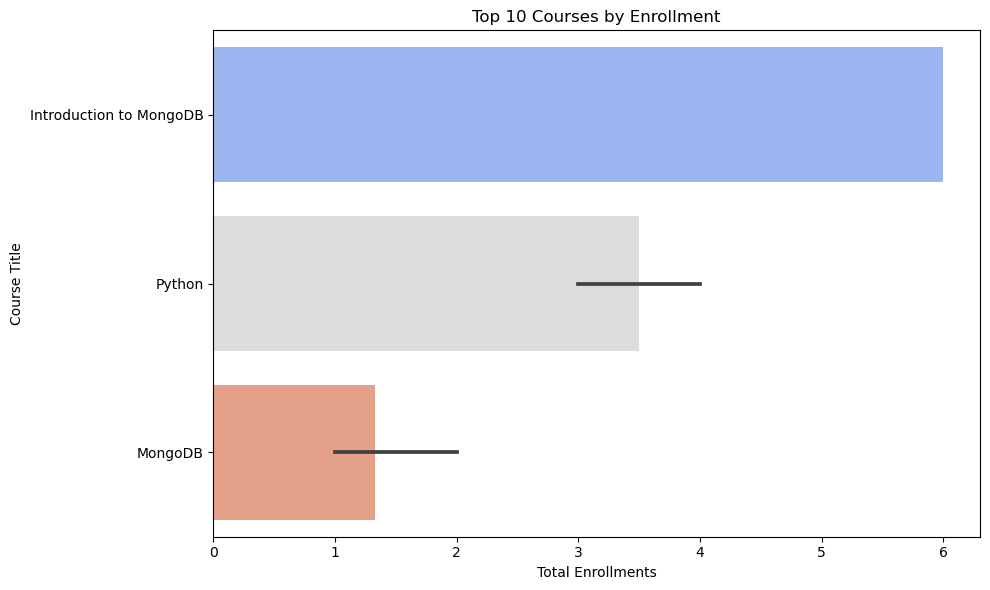

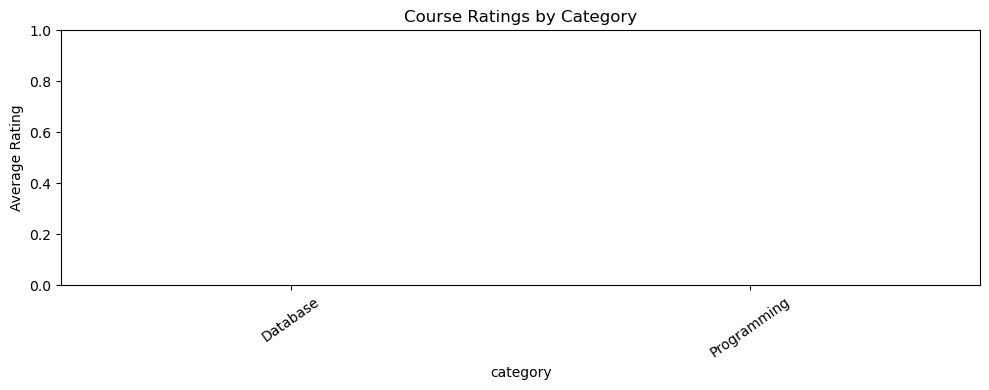

,total_enrollments,average_rating,course_id,title,category
0,2,None,mongodb-107,MongoDB,Database
1,4,None,python-103,Python,Programming
2,3,None,python-118,Python,Database
3,1,None,mongodb-106,MongoDB,Database
4,1,None,mongodb-103,MongoDB,Database
5,6,None,MongoDB-101,Introduction to MongoDB,Database


In [10]:
result = course_enrollment_stats()
result

In [21]:
# Task 4.2.2: Course Enrollment Statistics
# Student Performance Analysis:
# Average grade per student
# Completion rate by course
# Top-performing students

def student_performance_analysis(limit=10):
    try:
        results = {}

        # 1. Average grade per student
        avg_grade_pipeline = [
            {
                "$group": {
                    "_id": "$student_id",
                    "average_grade": {"$avg": "$grade"}
                }
            },
            {"$sort": {"average_grade": -1}}
        ]
        results["average_grade_per_student"] = list(submissions_collection.aggregate(avg_grade_pipeline))

        # 2. Completion rate by course
        completion_rate_pipeline = [
            {
                "$group": {
                    "_id": "$course_id",
                    "total": {"$sum": 1},
                    "completed": {
                        "$sum": {
                            "$cond": [{"$eq": ["$completed", True]}, 1, 0]
                        }
                    }
                }
            },
            {
                "$project": {
                    "_id": 1,
                    "completion_rate": {
                        "$cond": [
                            {"$eq": ["$total", 0]},
                            0,
                            {"$divide": ["$completed", "$total"]}
                        ]
                    }
                }
            },
            {"$sort": {"completion_rate": -1}}
        ]
        results["completion_rate_by_course"] = list(enrollments_collection.aggregate(completion_rate_pipeline))

        # 3. Top-performing students
        top_students_pipeline = [
            {
                "$group": {
                    "_id": "$user_id",
                    "average_grade": {"$avg": "$grade"}
                }
            },
            {"$sort": {"average_grade": -1}},
            {"$limit": limit}
        ]
        results["top_performing_students"] = list(submissions_collection.aggregate(top_students_pipeline))

        # Unified print
        print_result(results)
        return results

    except Exception as e:
        print(f"Error performing student performance analysis: {e}")
        return None

result = student_performance_analysis()
result



Total documents: 3
['average_grade_per_student',
 'completion_rate_by_course',
 'top_performing_students']


{'average_grade_per_student': [{'_id': None,
   'average_grade': 73.58333333333333}],
 'completion_rate_by_course': [{'_id': 'python-118', 'completion_rate': 1.0},
  {'_id': 'mongodb-103', 'completion_rate': 1.0},
  {'_id': 'MongoDB-101', 'completion_rate': 0.5},
  {'_id': 'mongodb-107', 'completion_rate': 0.5},
  {'_id': 'python-103', 'completion_rate': 0.0},
  {'_id': 'mongodb-106', 'completion_rate': 0.0}],
 'top_performing_students': [{'_id': 16, 'average_grade': 89.0},
  {'_id': 11, 'average_grade': 87.0},
  {'_id': 7, 'average_grade': 83.0},
  {'_id': 6, 'average_grade': 81.0},
  {'_id': 4, 'average_grade': 74.0},
  {'_id': 13, 'average_grade': 73.5},
  {'_id': 3, 'average_grade': 73.0},
  {'_id': 9, 'average_grade': 68.0},
  {'_id': 10, 'average_grade': 61.0},
  {'_id': 15, 'average_grade': 60.0}]}

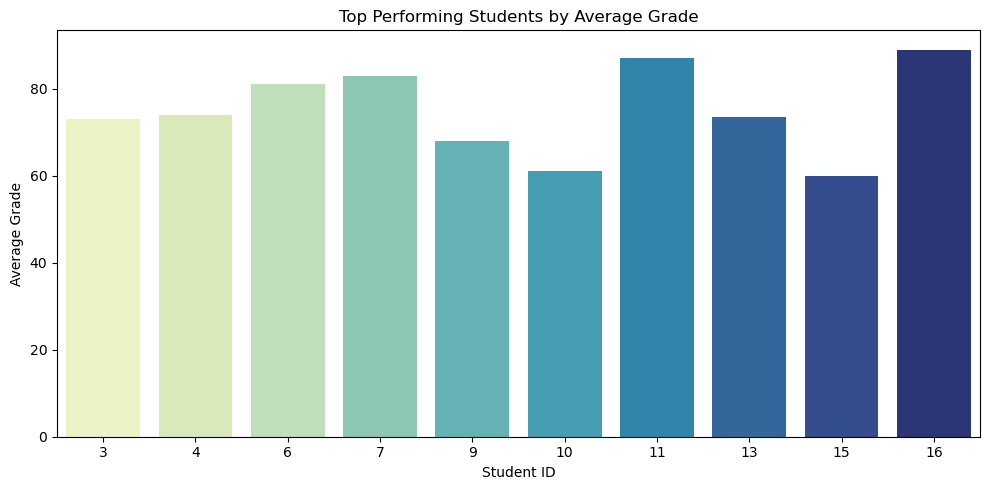

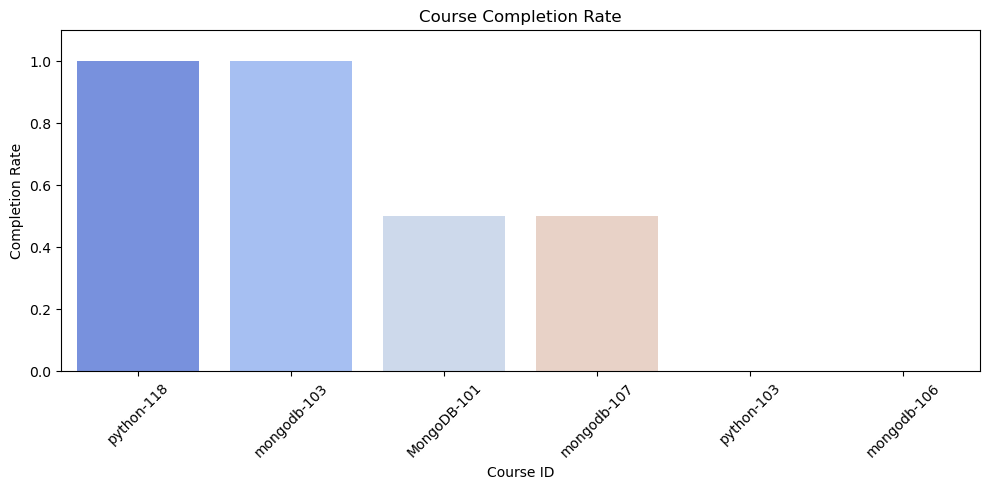

📊 Average Grade Across All Students: 73.58


In [ ]:
# I copied out the result of my query and used it to get the analytical insight of my data
# The input dictionary
analytics_data = {
    'average_grade_per_student': [{'_id': None, 'average_grade': 73.58333333333333}],
    'completion_rate_by_course': [
        {'_id': 'python-118', 'completion_rate': 1.0},
        {'_id': 'mongodb-103', 'completion_rate': 1.0},
        {'_id': 'MongoDB-101', 'completion_rate': 0.5},
        {'_id': 'mongodb-107', 'completion_rate': 0.5},
        {'_id': 'python-103', 'completion_rate': 0.0},
        {'_id': 'mongodb-106', 'completion_rate': 0.0}
    ],
    'top_performing_students': [
        {'_id': 16, 'average_grade': 89.0},
        {'_id': 11, 'average_grade': 87.0},
        {'_id': 7, 'average_grade': 83.0},
        {'_id': 6, 'average_grade': 81.0},
        {'_id': 4, 'average_grade': 74.0},
        {'_id': 13, 'average_grade': 73.5},
        {'_id': 3, 'average_grade': 73.0},
        {'_id': 9, 'average_grade': 68.0},
        {'_id': 10, 'average_grade': 61.0},
        {'_id': 15, 'average_grade': 60.0}
    ]
}

# --- 1. Top Performing Students ---
df_top_students = pd.DataFrame(analytics_data['top_performing_students'])
plt.figure(figsize=(10, 5))
sns.barplot(data=df_top_students, x="_id", y="average_grade", palette="YlGnBu")
plt.title("Top Performing Students by Average Grade")
plt.xlabel("Student ID")
plt.ylabel("Average Grade")
plt.tight_layout()
plt.show()

# --- 2. Completion Rate by Course ---
df_completion = pd.DataFrame(analytics_data['completion_rate_by_course'])
plt.figure(figsize=(10, 5))
sns.barplot(data=df_completion, x="_id", y="completion_rate", palette="coolwarm")
plt.title("Course Completion Rate")
plt.xlabel("Course ID")
plt.ylabel("Completion Rate")
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 3. Average Grade Display ---
average_grade = analytics_data['average_grade_per_student'][0]['average_grade']
print(f"Average Grade Across All Students: {average_grade:.2f}")



In [22]:
# Task 4.2.3: Instructor Analytics:
# Total students taught by each instructor
# Average course rating per instructor
# Revenue generated per instructor

def instructor_analytics():
    try:
        results = {}

        # 1. Total students taught by each instructor
        students_taught_pipeline = [
            {
                "$lookup": {
                    "from": "courses",
                    "localField": "course_id",
                    "foreignField": "course_id",
                    "as": "course_info"
                }
            },
            {"$unwind": "$course_info"},
            {
                "$group": {
                    "_id": "$course_info.instructor_id",
                    "total_students": {"$sum": 1}
                }
            },
            {"$sort": {"total_students": -1}}
        ]
        results["total_students_per_instructor"] = list(enrollments_collection.aggregate(students_taught_pipeline))

        # 2. Average course rating per instructor
        average_rating_pipeline = [
            {
                "$group": {
                    "_id": "$instructor_id",
                    "average_rating": {"$avg": "$rating"}
                }
            },
            {"$sort": {"average_rating": -1}}
        ]
        results["average_rating_per_instructor"] = list(lessons_collection.aggregate(average_rating_pipeline))

        # 3. Revenue generated per instructor
        revenue_pipeline = [
            {
                "$lookup": {
                    "from": "enrollments",
                    "localField": "course_id",
                    "foreignField": "course_id",
                    "as": "enrollment_info"
                }
            },
            {"$unwind": "$enrollment_info"},
            {
                "$group": {
                    "_id": "$instructor_id",
                    "total_revenue": {"$sum": "$price"}
                }
            },
            {"$sort": {"total_revenue": -1}}
        ]
        results["revenue_per_instructor"] = list(courses_collection.aggregate(revenue_pipeline))

        print_result(results)
        return results

    except Exception as e:
        print(f"Error performing instructor analytics: {e}")
        return None


    
result = instructor_analytics()
result  

Total documents: 3
['total_students_per_instructor',
 'average_rating_per_instructor',
 'revenue_per_instructor']


{'total_students_per_instructor': [{'_id': None, 'total_students': 17}],
 'average_rating_per_instructor': [{'_id': None,
   'average_rating': 4.095833333333333}],
 'revenue_per_instructor': [{'_id': None, 'total_revenue': 2252.47}]}

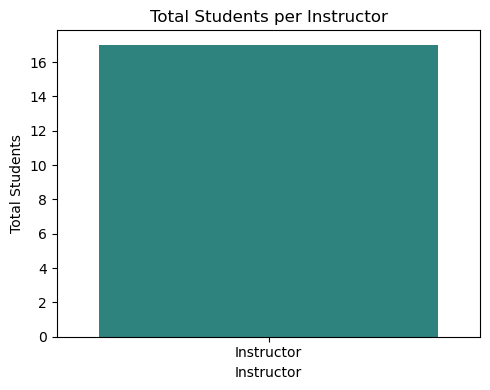

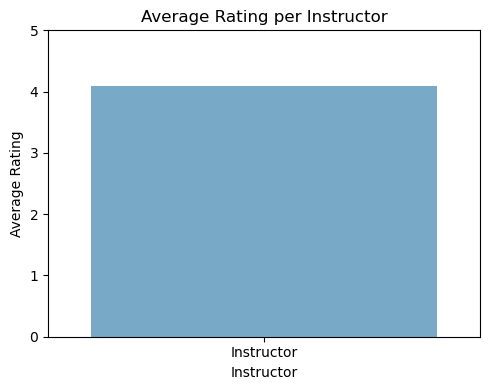

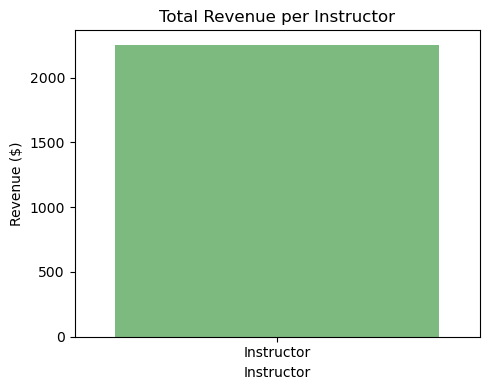

In [ ]:
# I copied out the result of my query and used it to get the analytical insight of my data

# Sample data
instructor_data = {
    'total_students_per_instructor': [{'_id': None, 'total_students': 17}],
    'average_rating_per_instructor': [{'_id': None, 'average_rating': 4.095833333333333}],
    'revenue_per_instructor': [{'_id': None, 'total_revenue': 2252.47}]
}

# Convert each to a DataFrame
df_students = pd.DataFrame(instructor_data['total_students_per_instructor'])
df_ratings = pd.DataFrame(instructor_data['average_rating_per_instructor'])
df_revenue = pd.DataFrame(instructor_data['revenue_per_instructor'])

# Replace None with a readable label
df_students['_id'] = df_students['_id'].fillna("Instructor")
df_ratings['_id'] = df_ratings['_id'].fillna("Instructor")
df_revenue['_id'] = df_revenue['_id'].fillna("Instructor")

# --- 1. Total Students Taught ---
plt.figure(figsize=(5, 4))
sns.barplot(data=df_students, x="_id", y="total_students", palette="viridis")
plt.title("Total Students per Instructor")
plt.ylabel("Total Students")
plt.xlabel("Instructor")
plt.tight_layout()
plt.show()

# --- 2. Average Rating ---
plt.figure(figsize=(5, 4))
sns.barplot(data=df_ratings, x="_id", y="average_rating", palette="Blues")
plt.title("Average Rating per Instructor")
plt.ylabel("Average Rating")
plt.xlabel("Instructor")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

# --- 3. Total Revenue ---
plt.figure(figsize=(5, 4))
sns.barplot(data=df_revenue, x="_id", y="total_revenue", palette="Greens")
plt.title("Total Revenue per Instructor")
plt.ylabel("Revenue ($)")
plt.xlabel("Instructor")
plt.tight_layout()
plt.show()


In [ ]:
# Task 4.2.4: Instructor Analytics:
# Monthly enrollment trends
# Most popular course categories
# Student engagement metrics

def advanced_analytics():
    try:
        results = {}

        # 1. Monthly Enrollment Trends
        monthly_enrollment_pipeline = [
            {
                "$group": {
                    "_id": {
                        "year": {"$year": "$enrolled_at"},  # Fixed field
                        "month": {"$month": "$enrolled_at"}
                    },
                    "enrollments": {"$sum": 1}
                }
            },
            {
                "$sort": {
                    "_id.year": 1,
                    "_id.month": 1
                }
            }
        ]
        results["monthly_enrollment_trends"] = list(enrollments_collection.aggregate(monthly_enrollment_pipeline))

        # 2. Most Popular Course Categories
        popular_categories_pipeline = [
            {
                "$lookup": {
                    "from": "courses",
                    "localField": "course_id",
                    "foreignField": "course_id",
                    "as": "course_info"
                }
            },
            {"$unwind": "$course_info"},
            {
                "$group": {
                    "_id": "$course_info.category",
                    "enrollments": {"$sum": 1}
                }
            },
            {"$sort": {"enrollments": -1}}
        ]
        results["most_popular_categories"] = list(enrollments_collection.aggregate(popular_categories_pipeline))

        # 3. Student Engagement Metrics (Courses Completed Per Student)
        engagement_pipeline = [
            {
                "$match": {
                    "completed": True
                }
            },
            {
                "$group": {
                    "_id": "$user_id",
                    "courses_completed": {"$sum": 1}
                }
            },
            {"$sort": {"courses_completed": -1}}
        ]
        results["student_engagement_metrics"] = list(enrollments_collection.aggregate(engagement_pipeline))

        return results  

    except Exception as e:
        print(f"Error performing advanced analytics: {e}")
        return None

# Run the function and print
result = advanced_analytics()
print_result(result)


Total documents: 3
['monthly_enrollment_trends',
 'most_popular_categories',
 'student_engagement_metrics']


## Part 5: Indexing and Performance

### Task 5.1: Index Creation

In [342]:
# Task 5.1.1 User email lookup

# Create index on 'email' field for fast lookup
resp = users_collection.create_index("email", unique=True)
resp

'email_1'

In [341]:
# Task 5.1.2 Course search by title and category

# Create a compound index on 'title' and 'category'
resp = courses_collection.create_index([("title", 1), ("category", 1)])
resp

'title_1_category_1'

In [343]:
# Task 5.1.3 Assignment queries by due date

resp = assignments_collection.create_index([("due_date", 1)])
resp

'due_date_1'

In [345]:
# Task 5.1.4 Enrollment queries by student and course
resp = enrollments_collection.create_index([("id",1), ("course", 1)])
resp

'id_1_course_1'

### Task 5.2: Query Optimization

In [ ]:
# Task 5.2.1 Analyze query performance using explain() method in PyMongo

# You're querying the courses_collection for all courses with:
# title containing the word "Python"
# category equal to "Programming"

query = {
    "title": {"$regex": "Python", "$options": "i"},
    "category": "Programming"
}

explain_result = courses_collection.find(query).explain()

# print the explanation
import pprint
pprint.pprint(explain_result)


{'command': {'$db': 'eduhub_dbs',
             'filter': {'category': 'Programming',
                        'title': {'$options': 'i', '$regex': 'Python'}},
             'find': 'courses'},
 'executionStats': {'allPlansExecution': [],
                    'executionStages': {'advanced': 2,
                                        'alreadyHasObj': 0,
                                        'docsExamined': 2,
                                        'executionTimeMillisEstimate': 8,
                                        'inputStage': {'advanced': 2,
                                                       'direction': 'forward',
                                                       'dupsDropped': 0,
                                                       'dupsTested': 0,
                                                       'executionTimeMillisEstimate': 8,
                                                       'filter': {'title': {'$options': 'i',
                                        

In [348]:
# Task 5.2.3 Document the performance improvements using Python timing functions

# User Lookup by Email
# Before Optimization (No Index)

import time

start = time.time()
users_collection.find_one({"email": "user@example.com"})
end = time.time()
print("User lookup (no index): {:.6f} seconds".format(end - start))


User lookup (no index): 0.005859 seconds


In [349]:
# Task 5.2.3 Document the performance improvements using Python timing functions
# After Optimization (Index on email)

# Create index once
users_collection.create_index("email", unique=True)

start = time.time()
users_collection.find_one({"email": "user@example.com"})
end = time.time()
print("User lookup (with index): {:.6f} seconds".format(end - start))

User lookup (with index): 0.000000 seconds


## Part 6: Data Validation and Error Handling

### Task 6.1: Schema Validation

In [ ]:
# Task 6.1.1 Required fields

from pymongo import MongoClient
from datetime import datetime


validation_schema = {
    "$jsonSchema": {
        "bsonType": "object",
        "required": ["name", "email", "created_at"],
        "properties": {
            "name": {
                "bsonType": "string",
                "description": "Name is required and must be a string"
            },
            "email": {
                "bsonType": "string",
                "description": "Email is required and must be a string"
            },
            "created_at": {
                "bsonType": "date",
                "description": "created_at is required and must be a date"
            }
        }
    }
}

# Apply validation to an existing collection
db.command({
    "collMod": "users",
    "validator": validation_schema,
    "validationLevel": "strict"
})

# Example valid insert
db.users.insert_one({
    "name": "Jane Doe",
    "email": "jane@example.com",
    "created_at": datetime.now()
})



C:\Users\Micheal\AppData\Local\Temp\ipykernel_19552\3810579407.py:39: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  "created_at": datetime.utcnow()


InsertOneResult(ObjectId('684c21ce50966d2c2d712141'), acknowledged=True)

In [351]:
# Task 6.1.2 Data type validation

# Define schema with data type validation
validation_schema = {
    "$jsonSchema": {
        "bsonType": "object",
        "required": ["name", "email", "age", "is_active", "created_at"],
        "properties": {
            "name": {
                "bsonType": "string",
                "description": "Name must be a string"
            },
            "email": {
                "bsonType": "string",
                "pattern": "^.+@.+$",
                "description": "Email must be a string and match email pattern"
            },
            "age": {
                "bsonType": "int",
                "minimum": 0,
                "description": "Age must be an integer greater than or equal to 0"
            },
            "is_active": {
                "bsonType": "bool",
                "description": "is_active must be a boolean"
            },
            "created_at": {
                "bsonType": "date",
                "description": "created_at must be a valid date"
            }
        }
    }
}

# Apply validation to an existing collection
db.command({
    "collMod": "users",
    "validator": validation_schema,
    "validationLevel": "strict"
})

# Example valid document insert
db.users.insert_one({
    "name": "John Doe",
    "email": "john@example.com",
    "age": 30,
    "is_active": True,
    "created_at": datetime.now()
})


InsertOneResult(ObjectId('684c22a750966d2c2d712142'), acknowledged=True)

In [352]:
# Task 6.1.3 Enum value restrictions

# Define schema with enum value restriction
validation_schema = {
    "$jsonSchema": {
        "bsonType": "object",
        "required": ["name", "role", "status"],
        "properties": {
            "name": {
                "bsonType": "string",
                "description": "Name must be a string"
            },
            "role": {
                "enum": ["student", "instructor", "admin"],
                "description": "Role must be one of: student, instructor, admin"
            },
            "status": {
                "enum": ["active", "inactive", "banned"],
                "description": "Status must be one of: active, inactive, banned"
            }
        }
    }
}

# Apply schema validation to existing 'users' collection
db.command({
    "collMod": "users",
    "validator": validation_schema,
    "validationLevel": "strict"
})

# Example valid document insert
db.users.insert_one({
    "name": "Imoru Micheal",
    "role": "student",
    "status": "active"
})

InsertOneResult(ObjectId('684c237f50966d2c2d712143'), acknowledged=True)

In [ ]:
# Task 6.1.4 Email format validation

# Email validation using regex pattern
email_schema = {
    "$jsonSchema": {
        "bsonType": "object",
        "required": ["name", "email"],
        "properties": {
            "name": {
                "bsonType": "string",
                "description": "Name must be a string"
            },
            "email": {
                "bsonType": "string",
                "pattern": "^[\\w\\.-]+@[\\w\\.-]+\\.\\w{2,}$",
                "description": "Must be a valid email address"
            }
        }
    }
}

# Apply the validator to the 'users' collection
db.command({
    "collMod": "users",
    "validator": email_schema,
    "validationLevel": "strict"
})

# Example of a valid document
db.users.insert_one({
    "name": "Imoru Micheal",
    "email": "imoru@example.com"})

InsertOneResult(ObjectId('684c23c850966d2c2d712144'), acknowledged=True)

### Task 6.2: Error Handling

In [355]:
# Task 6.2.1 Write queries that handle common errors: Duplicate key errors

from pymongo import errors

# Ensure unique index on email
users_collection.create_index("email", unique=True)

# Function to insert user
def insert_user(user_data):
    try:
        users_collection.insert_one(user_data)
        print("User inserted successfully.")
    except errors.DuplicateKeyError:
        print(f"Error: A user with the email '{user_data['email']}' already exists.")

# Example usage
user1 = {"name": "Micheal", "email": "micheal@example.com"}
user2 = {"name": "Mike", "email": "micheal@example.com"}  # duplicate email

insert_user(user1)
insert_user(user2)  # This will trigger DuplicateKeyError



User inserted successfully.
Error: A user with the email 'micheal@example.com' already exists.


In [356]:
# Task 6.2.2 Write queries that handle common errors: Invalid data type insertions

from pymongo import MongoClient, errors

# Step 1: Connect to MongoDB
client = MongoClient("mongodb://localhost:27017")
db = client["school"]
students = db["students"]

# Step 2: Define schema validation with data type enforcement
validator = {
    "$jsonSchema": {
        "bsonType": "object",
        "required": ["name", "age"],
        "properties": {
            "name": {"bsonType": "string"},
            "age": {"bsonType": "int"}
        }
    }
}

# Step 3: Apply the schema to the collection
try:
    db.command("collMod", "students", validator=validator, validationLevel="strict")
except errors.OperationFailure:
    db.create_collection("students", validator=validator)
except Exception as e:
    print(f"Schema setup error: {e}")

# Step 4: Define insert function with error handling
def insert_student(student):
    try:
        # Optional: manual type checking before insertion
        if not isinstance(student.get("age"), int):
            raise TypeError("Age must be an integer")

        students.insert_one(student)
        print(" Student inserted successfully.")

    except TypeError as te:
        print(f"Type Error: {te}")
    except errors.WriteError as we:
        print(f" MongoDB Write Error: {we}")
    except Exception as e:
        print(f" Unexpected Error: {e}")

# Step 5: Test with valid and invalid inputs
valid_student = {"name": "Jane", "age": 22}
invalid_student = {"name": "John", "age": "twenty"}

insert_student(valid_student)     # Should insert successfully
insert_student(invalid_student)   # Should raise TypeError


 Student inserted successfully.
Type Error: Age must be an integer


In [357]:
# Task 6.2.3 Write queries that handle common errors: Missing required fields

from pymongo import MongoClient, errors

# Step 1: Connect to MongoDB
client = MongoClient("mongodb://localhost:27017")
db = client["school"]
students = db["students"]

# Step 2: Define schema with required fields
validator = {
    "$jsonSchema": {
        "bsonType": "object",
        "required": ["name", "age", "email"],
        "properties": {
            "name": {"bsonType": "string"},
            "age": {"bsonType": "int"},
            "email": {"bsonType": "string"}
        }
    }
}

# Step 3: Apply validator to collection
try:
    db.command("collMod", "students", validator=validator, validationLevel="strict")
except errors.OperationFailure:
    db.create_collection("students", validator=validator)
except Exception as e:
    print(f"Schema setup error: {e}")

# Step 4: Insert function with required fields check
def insert_student(student):
    try:
        # Python-side check for missing required fields
        for field in ["name", "age", "email"]:
            if field not in student:
                raise ValueError(f"Missing required field: {field}")

        students.insert_one(student)
        print("Student inserted successfully.")

    except ValueError as ve:
        print(f"Validation Error: {ve}")
    except errors.WriteError as we:
        print(f"MongoDB Write Error: {we}")
    except Exception as e:
        print(f"Unexpected Error: {e}")

# Step 5: Test with valid and invalid inputs
valid_student = {"name": "Alice", "age": 20, "email": "alice@example.com"}
missing_field_student = {"name": "Bob", "age": 25}  # Missing email

insert_student(valid_student)         # Should insert
insert_student(missing_field_student) # Should raise ValueError


Student inserted successfully.
Validation Error: Missing required field: email
